In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [4]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
specific_column = df['Class']
print(specific_column)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [37]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
df.shape


(284807, 31)

In [5]:
y=df['Class']

In [6]:
x= df.drop('Class', axis=1)

<Axes: xlabel='Class', ylabel='count'>

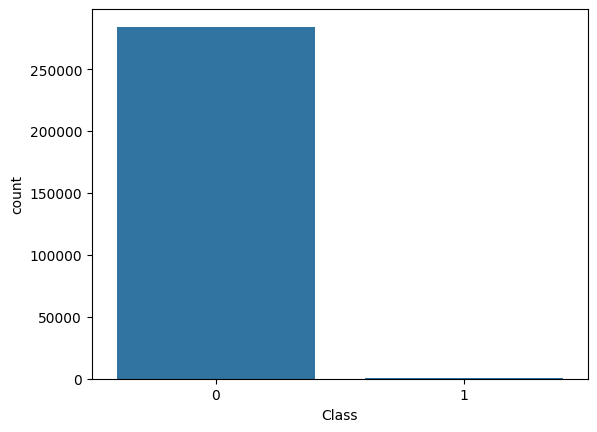

In [38]:
sns.countplot(x=df['Class'])


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size = 0.2)

## RANDOM FOREST


In [8]:
rf = RandomForestClassifier()

In [9]:
lr.fit(X_train, Y_train)

RandomForestClassifier()

In [10]:
lr_predict = lr.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
lr_acc_score = accuracy_score(Y_test, lr_predict)
lr_acc_score

0.9996137776061234

In [12]:


from sklearn.metrics import precision_score
pr_precision = precision_score(Y_test, lr_predict)
print('Precision:', pr_precision)

Precision: 0.9864864864864865


In [13]:


from sklearn.metrics import f1_score
lr_f1 = f1_score(Y_test, lr_predict) 
print('F1 Score:', lr_f1)

F1 Score: 0.8690476190476191


In [14]:


from sklearn.metrics import recall_score
lr_recall = recall_score(Y_test, lr_predict)

print('Recall:', lr_recall)

Recall: 0.776595744680851


## DECISION TREE


In [15]:

dt_classifier = DecisionTreeClassifier()

In [16]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [17]:
dt_predict = dt_classifier.predict(X_test)
dt_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
dt_acc_score = accuracy_score(Y_test, dt_predict)
dt_acc_score

0.9991397773954567

In [19]:
from sklearn.metrics import precision_score
pr_precision = precision_score(Y_test, dt_predict)
print('Precision:', pr_precision)

Precision: 0.7419354838709677


In [20]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(Y_test, dt_predict) 
print('F1 Score:', lr_f1)

F1 Score: 0.7379679144385026


In [21]:
from sklearn.metrics import recall_score
lr_recall = recall_score(Y_test, dt_predict)

print('Recall:', lr_recall)

Recall: 0.7340425531914894


## LOGISTIC REGRESSION


In [22]:
from sklearn.linear_model import  LogisticRegression
log_reg_model = LogisticRegression()

In [23]:
log_reg_model.fit(X_train, Y_train)

c:\Users\green\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
log_reg_predict = log_reg_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
log_reg_acc_score = accuracy_score(Y_test, log_reg_predict)
log_reg_acc_score

0.9985428882412837

In [26]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(Y_test, log_reg_predict) 
print('F1 Score:', lr_f1)

F1 Score: 0.6066350710900474


In [27]:
from sklearn.metrics import recall_score
lr_recall = recall_score(Y_test, log_reg_predict)
print('Recall:', lr_recall)

Recall: 0.6808510638297872


##  k-Nearest Neighbors (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [29]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [30]:
knn_classifier_predict = knn_classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
knn_acc_score = accuracy_score(Y_test,knn_classifier_predict)
knn_acc_score

0.9984024437344194

In [32]:
##Precision= True Positives + False Positives /True Positives
from sklearn.metrics import precision_score
knn_precision = precision_score(Y_test, knn_classifier_predict)
print('Precision:', knn_precision)

Precision: 1.0


In [33]:
##F1=  2×Precision×Recall/Precision+Recall
from sklearn.metrics import f1_score
knn_f1 = f1_score(Y_test, knn_classifier_predict) 
print('F1 Score:', knn_f1)

F1 Score: 0.061855670103092786


In [34]:
##Recall= True Positives+False Negatives /True Positives
from sklearn.metrics import recall_score
knn_recall = recall_score(Y_test, knn_classifier_predict)

print('Recall:', knn_recall)

Recall: 0.031914893617021274


In [43]:
if not os.path.exists('Models'):
    os.makedirs('Models')

if not os.path.exists('Scalers'):
    os.makedirs('Scalers')

joblib.dump(lr, 'Models/lr.pkl')
joblib.dump(log_reg_model, 'Models/log_reg_model.pkl') 
joblib.dump(knn_classifier, 'Models/knn_classifier.pkl')
joblib.dump(dt_classifier, 'Models/dt_classifier.pkl')

['Models/dt_classifier.pkl']